In [4]:
import pandas as pd

In [5]:
dataset=pd.read_csv("preplacementdata.csv")

In [6]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [7]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [10]:
import seaborn as sns

C:\Users\MohanRaj\AppData\Local\Temp\ipykernel_2820\2590864738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

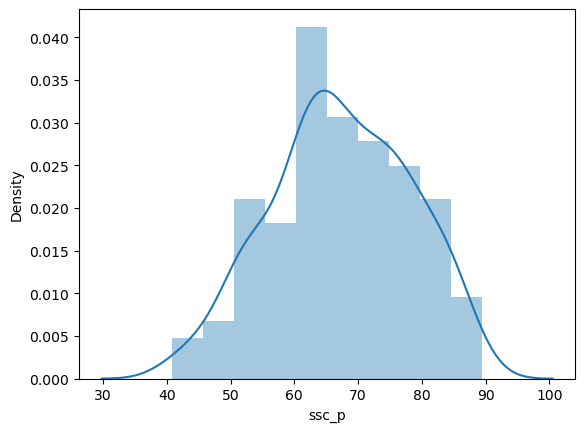

In [11]:
sns.distplot(dataset["ssc_p"])

In [22]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.displot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(statrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    dist=norm(sample_mean,sample_std) 
    values= [value for value in range(startrange,endrange)]
    probabilities= [dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}". format(startrange,endrange,sum(probabilities)))
    return prob

TypeError: KDE.__init__() got an unexpected keyword argument 'color'

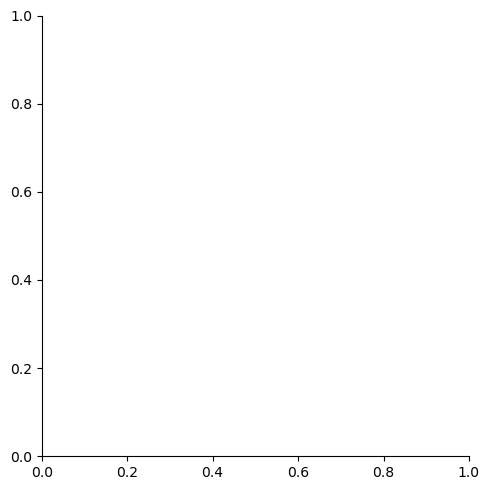

In [23]:
get_pdf_probability(dataset["ssc_p"],60,70)

In [27]:
from statsmodel.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["ssc_p"])
ecdf(78)          

          

ModuleNotFoundError: No module named 'statsmodel'

In [28]:
!pip install statsmodels

ERROR: Could not find a version that satisfies the requirement statsmodels (from versions: none)
ERROR: No matching distribution found for statsmodels


In [29]:
from statsmodel.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["ssc_p"])
ecdf(78)          


ModuleNotFoundError: No module named 'statsmodel'

In [34]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    
    values=[i for i in dataset]
    
    z_score=[((j-mean)/std) for j in values]
    
    sns.displot(z_score,kde=True)
    
    sum(z_score)/len(z_score)

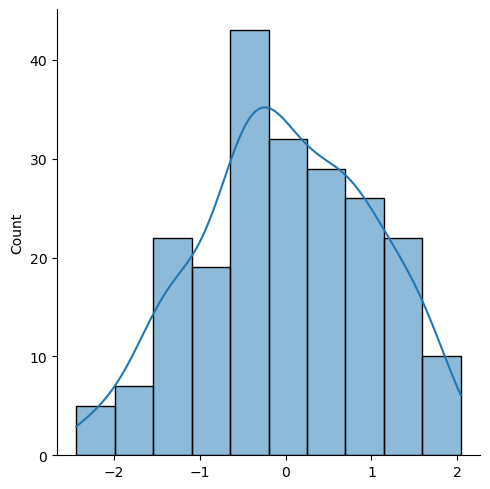

In [35]:
stdNBgraph(dataset["ssc_p"])